In [8]:
!pip3 install mglearn

You are using pip version 18.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [93]:
%matplotlib inline
import pandas as pd
import mglearn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

X.shape:(26, 2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


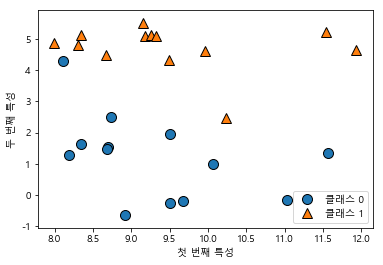

In [94]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:,0],X[:,1],y) # 첫번째 특성, 두번째 특성, 레이블
plt.legend(['클래스 0','클래스 1'],loc=4)
plt.xlabel("첫 번째 특성")
plt.ylabel("두 번째 특성")
print("X.shape:{}".format(X.shape))

Text(0,0.5,'타깃')

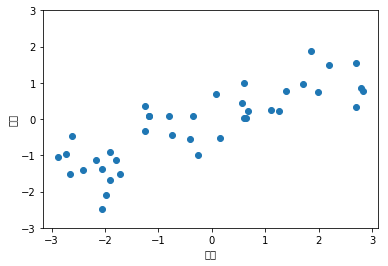

In [29]:
X, y =mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim(-3,3)  # y축 범위설정
plt.xlabel("특성")
plt.ylabel('타깃')

In [30]:
from sklearn.datasets import load_breast_cancer

In [31]:
cancer = load_breast_cancer()
print("cancer.keys():\n{}".format(cancer.keys()))

cancer.keys():
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [32]:
print("유방암 데이터의 형태:{}".format(cancer.data.shape))

유방암 데이터의 형태:(569, 30)


In [33]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [34]:
from sklearn.datasets import load_boston
boston = load_boston()

In [35]:
print("데이터의 형태:{}".format(boston.data.shape))

데이터의 형태:(506, 13)


## k-최근접 이웃

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


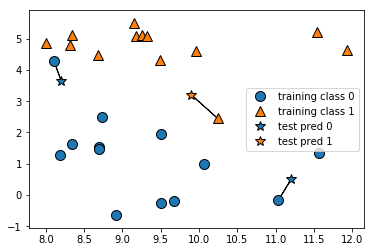

In [36]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


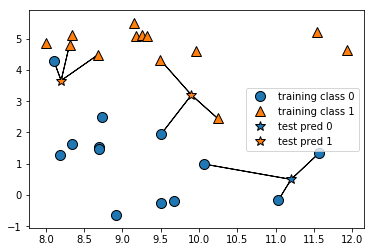

In [38]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
#다수의 클래스가 레이블이 됨.

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X,y = mglearn.datasets.make_forge()
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [43]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [44]:
print("테스트 세트 예측:{}".format(clf.predict(X_test)))

테스트 세트 예측:[1 0 1 0 1 0 0]


In [45]:
print("테스트 세트 정확도:{:.2f}".format(clf.score(X_test,y_test)))

테스트 세트 정확도:0.86


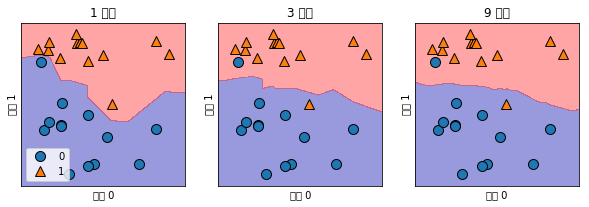

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메소드는 self 오브젝트를 리턴합니다
    # 그래서 객체 생성과 fit 메소드를 한 줄에 쓸 수 있습니다
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

이웃을 하나 선택했을 때는 결졍 경계가 훈련 데이터에 가깝게 따라감. 이웃의 수를 늘릴수록 결졍 경계는 부드러워짐. 부드러운 경계는 더 단순한 모델을 의미함. 다시 말해 이웃을 적게 사용하면 모델의 복잡도가 높아지고 많이 사용하면 낮아짐.

In [48]:
from sklearn.datasets import load_breast_cancer

In [49]:
cancer = load_breast_cancer()
X_train,X_test,y_train,y_test=train_test_split(
cancer.data,cancer.target,stratify=cancer.target,random_state=66)

In [52]:
training_accuracy=[]
test_accuracy=[]
neighbors_settings=range(1,11)

In [53]:
for n_neighbors in neighbors_settings:
    clf=KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train,y_train)
    training_accuracy.append(clf.score(X_train,y_train))
    test_accuracy.append(clf.score(X_test,y_test))

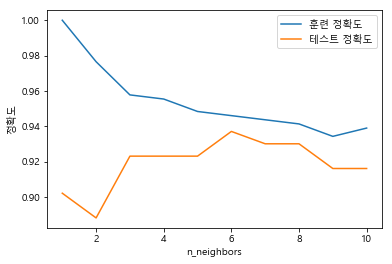

In [98]:
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

최근접 이웃의 수가 하나일떄는 훈련 데이터에 대한 예측이 완벽함. 하지만 이웃의 수가 늘어나면 모델은 단순해지고 훈련 데이터의 정확도는 줄어듦. 이웃을 하나 사용한 테스트 세트의 정확도는 이웃을 많이 사용했을 때보다 낮음. 이것은 1-최근접 이웃이 모델을 너무 복잡하게 만들었다는 것을 설명해줌. 반대로 이웃을 10개 사용했을때는 모델이 너무 단순해서 정확도는 더 나빠짐. 정확도가 가장 좋을 떄는 중간 정도인 6개.

## k-최근접 이웃 회귀

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


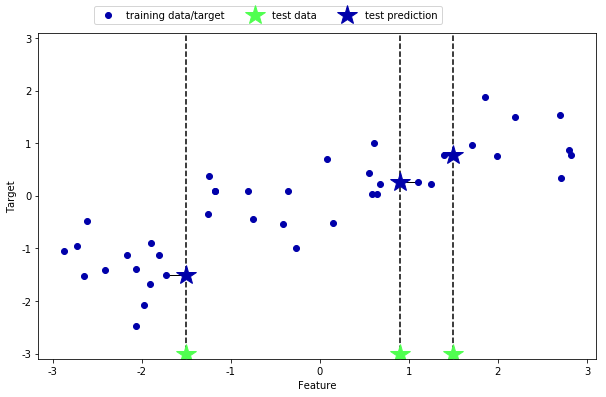

In [78]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


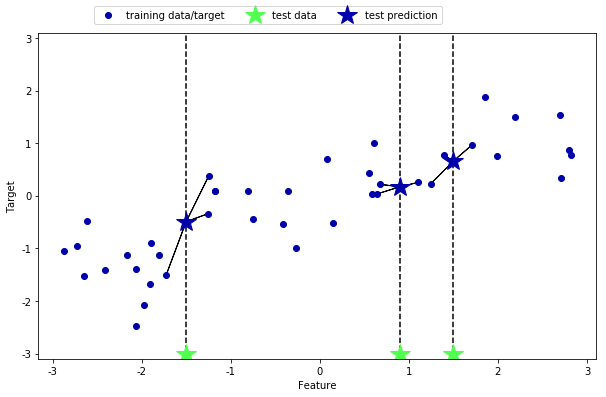

In [80]:
mglearn.plots.plot_knn_regression(n_neighbors=3)
# 여러 개의 최근접 이웃을 사용할 땐 이웃 간의 평균이 예측 됨.

In [82]:
from sklearn.neighbors import KNeighborsRegressor

In [84]:
X, y = mglearn.datasets.make_wave(n_samples=40)
#표본 데이터의 수 40개

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [92]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 예측:
[-0.76885025  0.16870118  0.81020743 -1.49113268 -1.49113268 -1.35931037
  0.16870118  0.90283566 -0.13712298 -1.49113268]
테스트 세트 R^2: 0.65


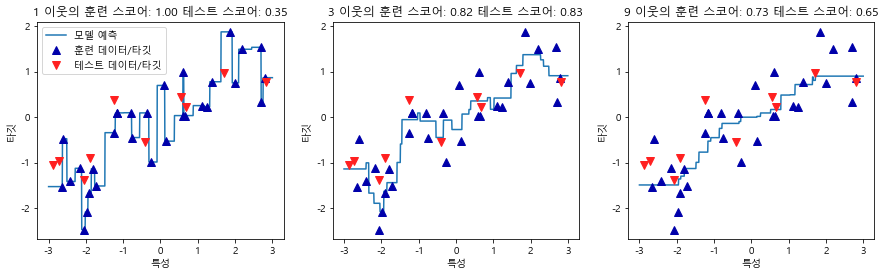

In [95]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

이웃을 하나만 사용할 때는 훈련 세트의 각 데이터 포인트가 예측에 주는 영향이 커서 예측값이 훈련 데이터 포인트를 모두 지나감. 이는 매우 불안정한 예측을 만들어냄. 이웃을 많이 사용하면 훈련 데이터에는 잘 안 맞을 수 있지만 더 안정된 예측을 얻게됨.

k-NN의 장점은 이해하기 매우 쉬운 모델이라는 점. 그리고 많이 조정하지 않아도 좋은 성능을 발휘함. 훈련 세트가 매우 크면 예측이 느려짐. k-NN알고리즘을 사용할 땐 데이터를 전처리하는 과정이 중요함. 그리고 많은 특성을 가진 데이터셋에는 잘 작동하지 않으며, 특성 값 대부분이 0인 데이터셋과는 특히 잘 작동하지 않음.